Функция анимации

In [22]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import HTML

In [23]:
plt.rcParams["figure.figsize"] = (8,2)
plt.rcParams["figure.dpi"] = 300
plt.rcParams['axes.grid'] = True

Визуализируем данные Германа

In [24]:
data = np.loadtxt('Карнуп упражнение 3.csv', delimiter=';')
x = data[:, 1]
t = data[:, 0]
t, x

(array([2.0000e-03, 4.0000e-03, 6.0000e-03, ..., 3.0286e+01, 3.0288e+01,
        3.0290e+01]),
 array([ 638.3976551, 1444.4553   , 1650.806058 , ..., 1444.4553   ,
        1444.4553   , 1238.104543 ]))

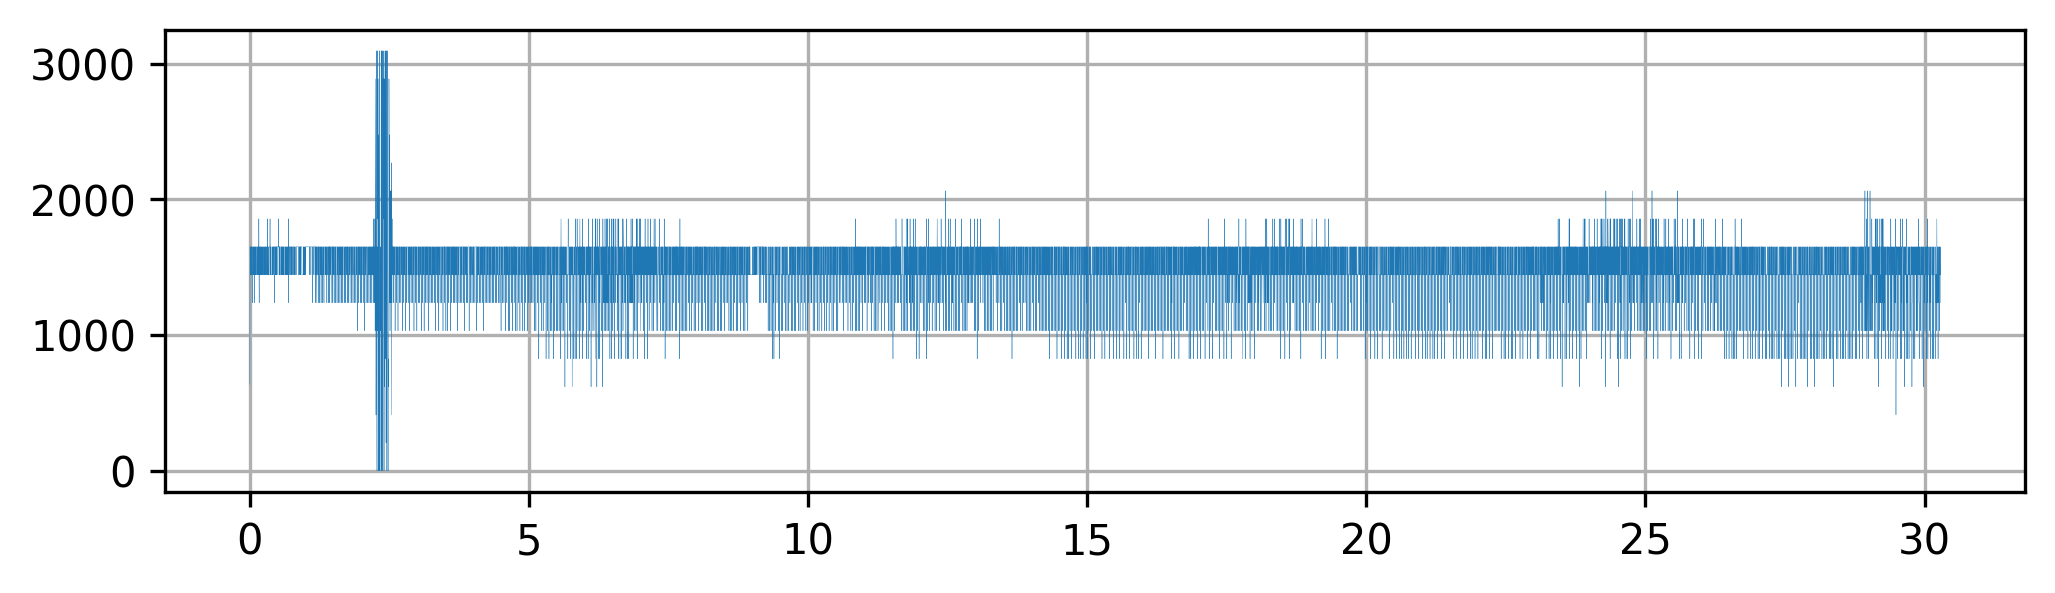

In [25]:
plt.plot(t, x, linewidth=0.1)

Функция анимированной визуализации сигнала

In [26]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import HTML

In [27]:
plt.rcParams["figure.figsize"] = (8,2)
plt.rcParams["figure.dpi"] = 100
plt.rcParams['axes.grid'] = True

In [28]:
def animation(x, t, width=10, shift=1, frames=20, min_y = -1, max_y=1):
    fig, ax = plt.subplots()
    l, = ax.plot([],[])
    def animate(i):
        l.set_data(t[i:i+width+1], x[i:i+width+1])
        ax.set_xlim(t[i], t[i+width])
        ax.set_ylim(min_y, max_y)
    return matplotlib.animation.FuncAnimation(fig, animate, frames=np.arange(frames)*shift)

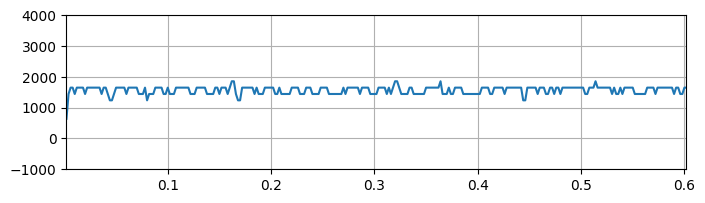

In [29]:
HTML(animation(x, t, width=300, shift=5, frames=200, min_y = -1000, max_y=4000).to_jshtml())

Другой способ визуализации данные (в режиме реального времени):

In [30]:
def animation(x, t, width=10, shift=1, frames=20, min_y = -1, max_y=1):
    fig, ax = plt.subplots()
    l, = ax.plot([],[])
    def animate(i):
        l.set_data(t[i:i+width+1], x[i:i+width+1])
        ax.set_xlim(t[i], t[i+width])
        ax.set_ylim(min_y, max_y)
    return matplotlib.animation.FuncAnimation(fig, animate, frames=np.arange(frames)*shift)

In [31]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import HTML
plt.rcParams["figure.figsize"] = (8,2)
plt.rcParams["figure.dpi"] = 100
plt.rcParams['axes.grid'] = True
data = np.loadtxt('Карнуп упражнение 3.csv', delimiter=';')
x = data[:, 1]
t = data[:, 0]
import time



/var/folders/94/h8q60m7530z65nws56nf5z440000gn/T/ipykernel_21716/1505363786.py:3: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(t[100*i], t[200*i])


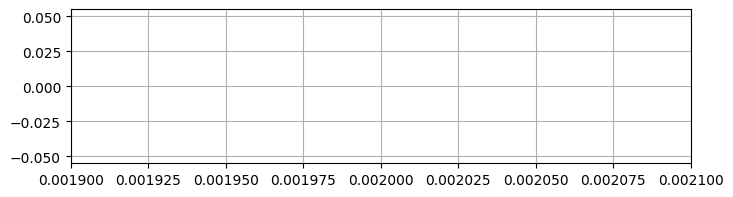

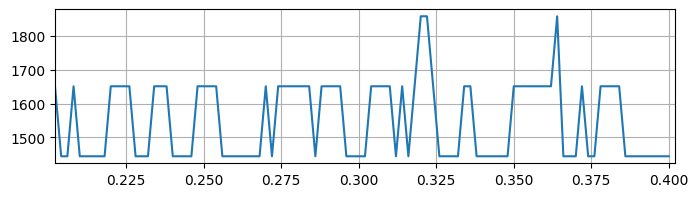

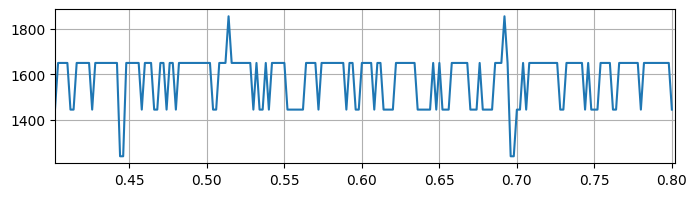

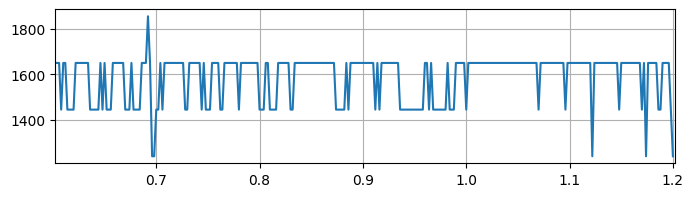

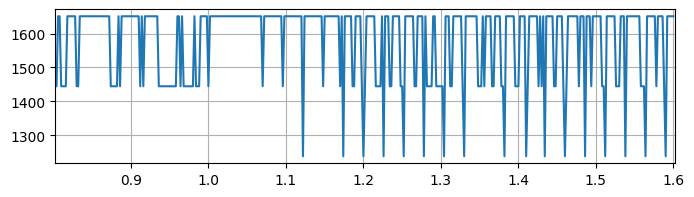

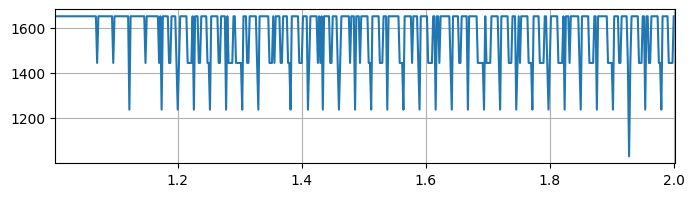

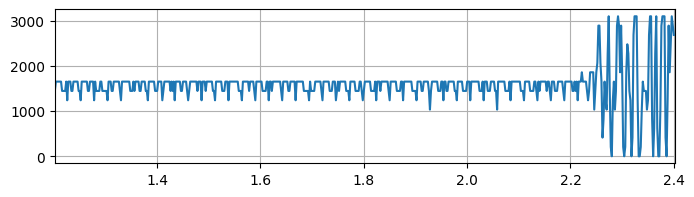

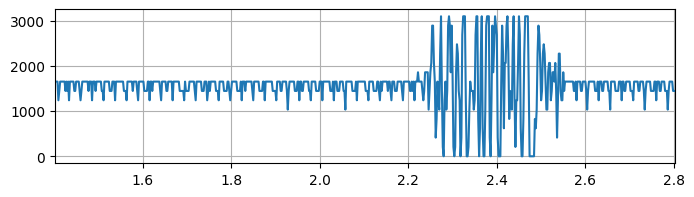

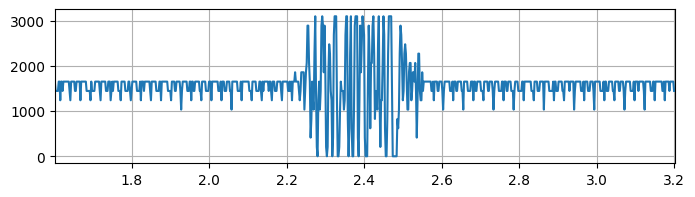

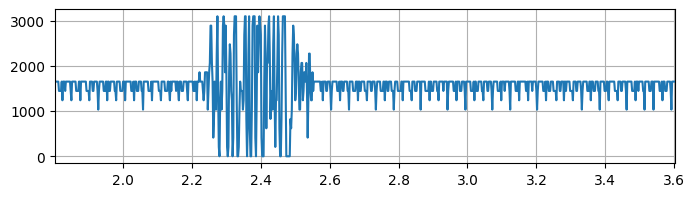

In [32]:
for i in range(10):
    plt.close()
    plt.xlim(t[100*i], t[200*i])
    plt.plot(t[100*i:200*i], x[100*i:200*i])
    plt.show()
    time.sleep(1)

Выделим активный участок ЭМГ

In [33]:
plt.rcParams["figure.figsize"] = (8,2)
plt.rcParams["figure.dpi"] = 100
plt.rcParams['axes.grid'] = True

In [34]:
slc = [(t>2)&(t<2.6)]
x_slc = x[slc]
t_slc = t[slc]
x_slc.size, t_slc.size

/var/folders/94/h8q60m7530z65nws56nf5z440000gn/T/ipykernel_21716/5700918.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  x_slc = x[slc]
/var/folders/94/h8q60m7530z65nws56nf5z440000gn/T/ipykernel_21716/5700918.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  t_slc = t[slc]


(299, 299)

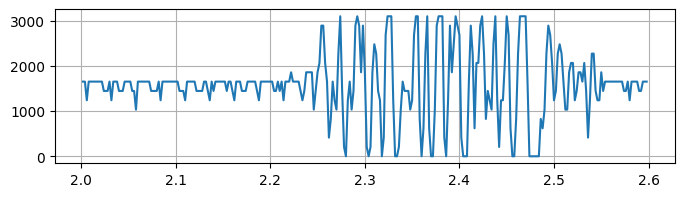

In [35]:
plt.plot(t_slc, x_slc)

In [36]:
import os
import numpy as np
import pylab as plt
import scipy.signal as sg
import sounddevice as sd
import pandas as pd

from time import sleep

<Figure size 800x200 with 0 Axes>

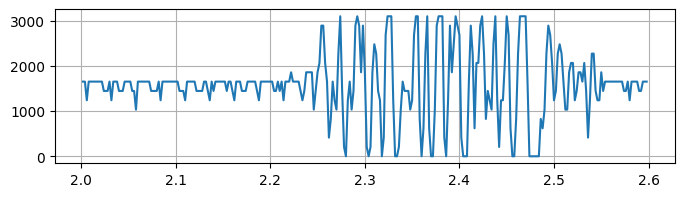

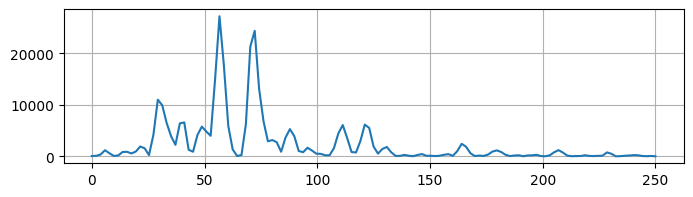

<Figure size 800x200 with 0 Axes>

In [38]:
plt.plot(t_slc, x_slc)
plt.figure()


T = 0.002
fs = 1 / T
freq, x_spec = sg.welch(x_slc, fs)
plt.plot(freq, x_spec)
plt.figure()

Построение спектрограммы

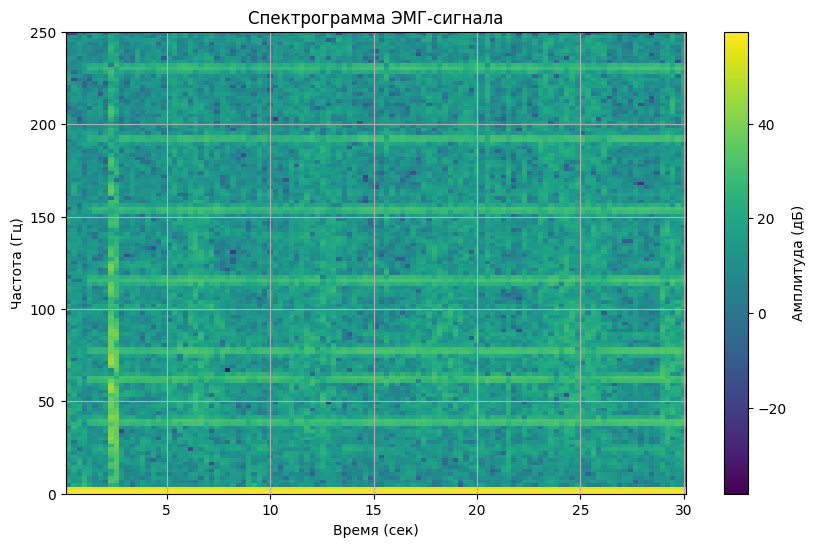

In [158]:
import numpy as np
import matplotlib.pyplot as plt

# Ваш массив данных и частота дискретизации
data = x  # Замените эту строку на ваш реальный сигнал
sampling_rate = 500  # Частота дискретизации в Гц

# Создаем спектрограмму
plt.figure(figsize=(10, 6))
plt.specgram(data, Fs=sampling_rate, cmap='viridis', NFFT=256, noverlap=128)
plt.xlabel('Время (сек)')
plt.ylabel('Частота (Гц)')
plt.title('Спектрограмма ЭМГ-сигнала')
plt.colorbar(label='Амплитуда (дБ)')

plt.show()


In [159]:
x.size/500

30.29

<Figure size 800x200 with 0 Axes>

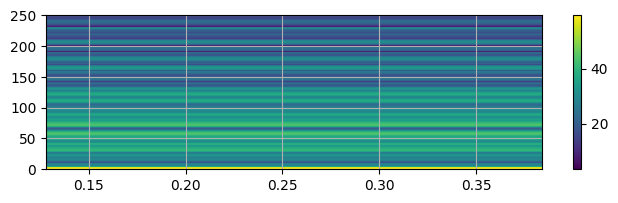

<Figure size 800x200 with 0 Axes>

In [170]:
plt.specgram(x_slc, Fs=sampling_rate, cmap='viridis', NFFT=256, noverlap=128)
plt.colorbar()
plt.figure()

Фильтрация сигнала на частоте 50 Гц

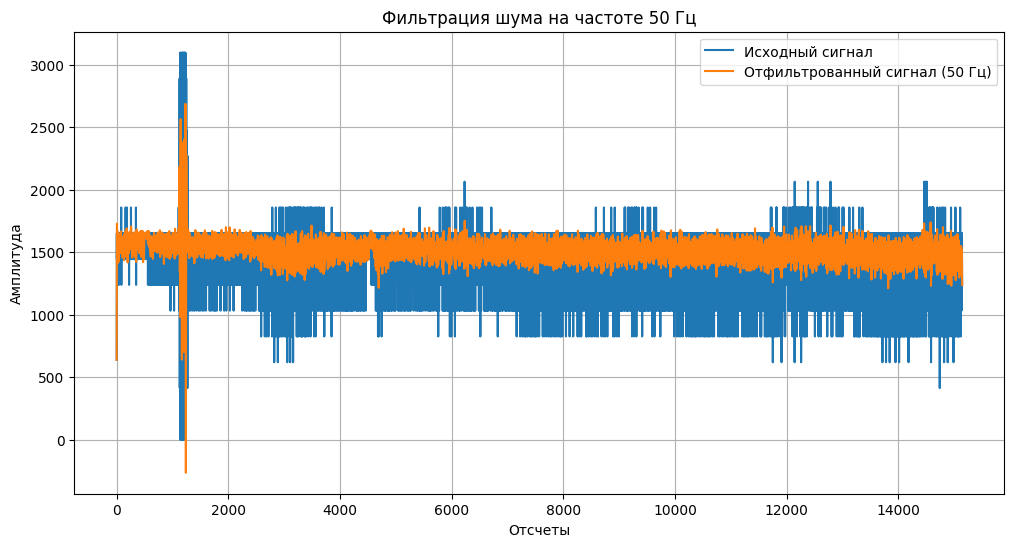

In [161]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Ваш массив данных и частота дискретизации
data = x  # Замените эту строку на ваш реальный сигнал
sampling_rate = 500  # Частота дискретизации в Гц

# Функция для создания фильтра нижних частот
def butter_lowpass(data, cutoff_frequency, sampling_rate, order=4):
    nyquist = 0.5 * sampling_rate
    normal_cutoff = cutoff_frequency / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

# Задаем параметры фильтрации
cutoff_frequency = 50  # Частота среза фильтра в Гц

# Фильтруем сигнал
filtered_data = butter_lowpass(data, cutoff_frequency, sampling_rate)

# Строим исходный и отфильтрованный сигнал
plt.figure(figsize=(12, 6))
plt.plot(data, label='Исходный сигнал')
plt.plot(filtered_data, label='Отфильтрованный сигнал (50 Гц)')
plt.xlabel('Отсчеты')
plt.ylabel('Амплитуда')
plt.legend()
plt.title('Фильтрация шума на частоте 50 Гц')
plt.show()


<Figure size 800x200 with 0 Axes>

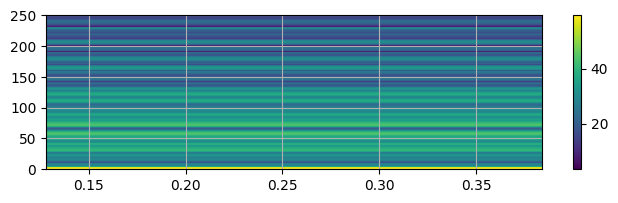

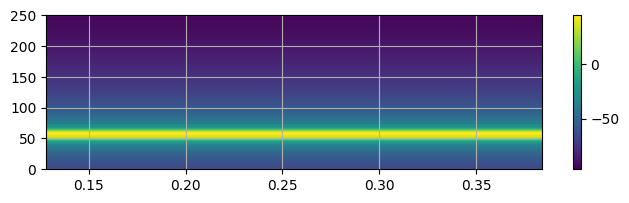

<Figure size 800x200 with 0 Axes>

In [169]:
plt.specgram(data, Fs=sampling_rate, cmap='viridis', NFFT=256, noverlap=128)
plt.colorbar()
plt.figure()
plt.specgram(filtered_data, Fs=sampling_rate, cmap='viridis', NFFT=256, noverlap=128)
plt.colorbar()
plt.figure()

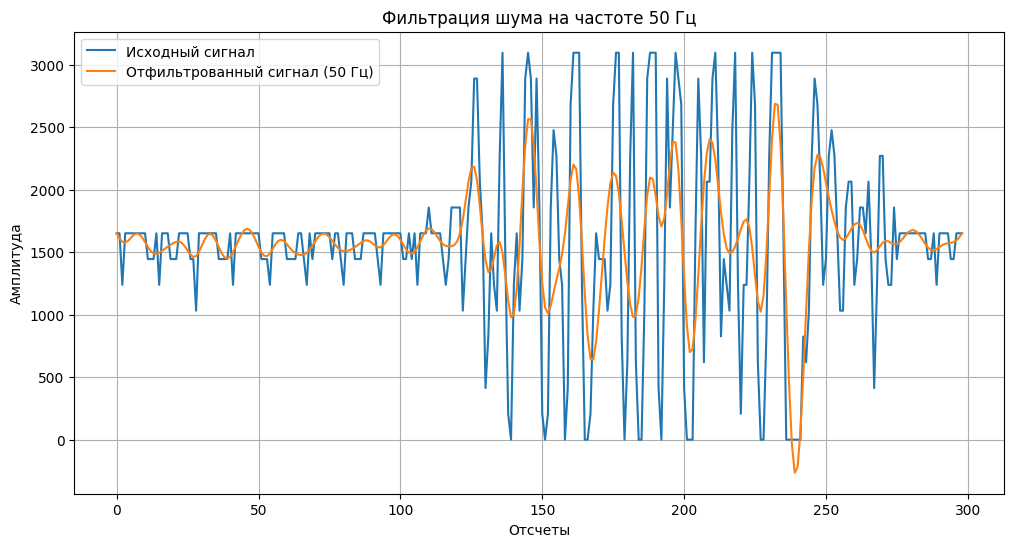

In [163]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Ваш массив данных и частота дискретизации
data = x_slc  # Замените эту строку на ваш реальный сигнал
sampling_rate = 500  # Частота дискретизации в Гц

# Функция для создания фильтра нижних частот
def butter_lowpass(data, cutoff_frequency, sampling_rate, order=4):
    nyquist = 0.5 * sampling_rate
    normal_cutoff = cutoff_frequency / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

# Задаем параметры фильтрации
cutoff_frequency = 50  # Частота среза фильтра в Гц

# Фильтруем сигнал
filtered_data = butter_lowpass(data, cutoff_frequency, sampling_rate)

# Строим исходный и отфильтрованный сигнал
plt.figure(figsize=(12, 6))
plt.plot(data, label='Исходный сигнал')
plt.plot(filtered_data, label='Отфильтрованный сигнал (50 Гц)')
plt.xlabel('Отсчеты')
plt.ylabel('Амплитуда')
plt.legend()
plt.title('Фильтрация шума на частоте 50 Гц')
plt.show()


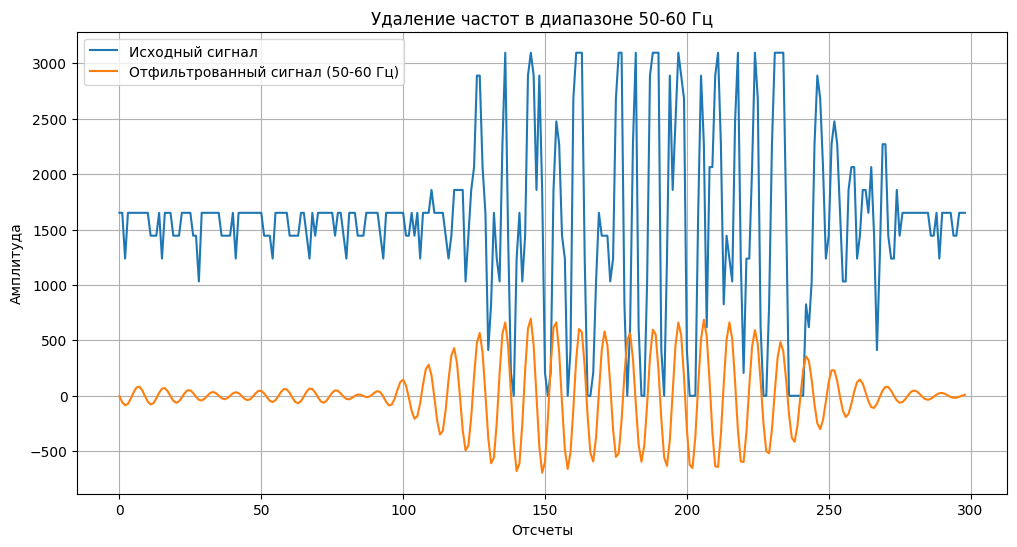

In [164]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Ваш массив данных и частота дискретизации
data = x_slc # Замените эту строку на ваш реальный сигнал
sampling_rate = 500  # Частота дискретизации в Гц

# Функция для создания фильтра полосы пропускания
def butter_bandpass(data, lowcut, highcut, sampling_rate, order=4):
    nyquist = 0.5 * sampling_rate
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band', analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

# Задаем параметры фильтрации
lowcut = 50  # Нижняя граница частоты в Гц
highcut = 60  # Верхняя граница частоты в Гц

# Фильтруем сигнал
filtered_data = butter_bandpass(data, lowcut, highcut, sampling_rate)

# Строим исходный и отфильтрованный сигнал
plt.figure(figsize=(12, 6))
plt.plot(data, label='Исходный сигнал')
plt.plot(filtered_data, label=f'Отфильтрованный сигнал ({lowcut}-{highcut} Гц)')
plt.xlabel('Отсчеты')
plt.ylabel('Амплитуда')
plt.legend()
plt.title('Удаление частот в диапазоне 50-60 Гц')
plt.show()


<Figure size 800x200 with 0 Axes>

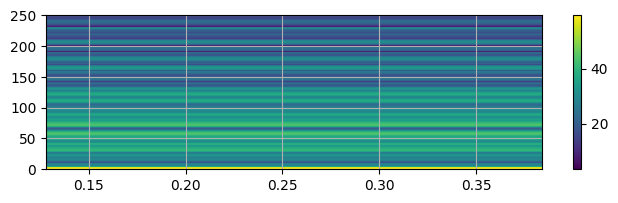

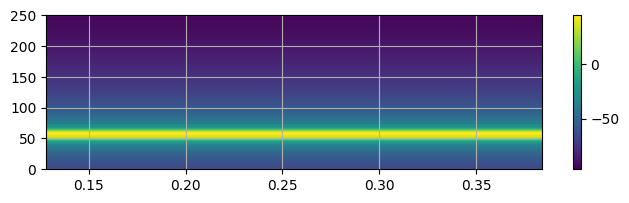

<Figure size 800x200 with 0 Axes>

In [168]:
plt.specgram(data, Fs=sampling_rate, cmap='viridis', NFFT=256, noverlap=128)
plt.colorbar()
plt.figure()
plt.specgram(filtered_data, Fs=sampling_rate, cmap='viridis', NFFT=256, noverlap=128)
plt.colorbar()
plt.figure()